# Machine Learning Final Project: Kaggle Competition
Competition on the Spaceship Titanic

- Louis Widi Anandaputra
- Bagus Alwan Bambang

## Library and Data Preparation

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
print("Training Data Info:\n\n")
print(df_train.info())
print("\n\nTesting Data Info:\n\n")
print(df_test.info())

Training Data Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


Testing Data Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (tota

In [4]:
print('Missing Values in Train Set:\n\n')
print(df_train.isna().sum())
print('n\n\Missing Values in Test Set:\n\n')
print(df_test.isna().sum())

Missing Values in Train Set:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
n
\Missing Values in Test Set:


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
print("Unique ID on train set:", df_train['PassengerId'].nunique())
print("Unique ID on test set:",df_test['PassengerId'].nunique())

Unique ID on train set: 8693
Unique ID on test set: 4277


No duplication on train/test

In [6]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Transported (as Target) Distribution')

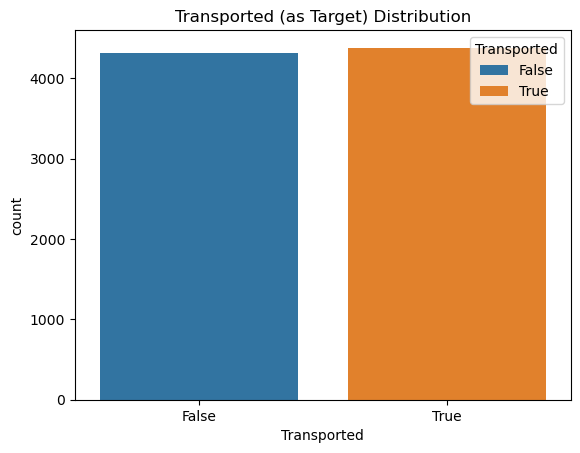

In [7]:
sns.countplot(x = df_train['Transported'], hue = df_train['Transported'])
plt.title("Transported (as Target) Distribution")

The class distribution is balanced.

Text(0.5, 1.0, 'Passenger Age Distribution')

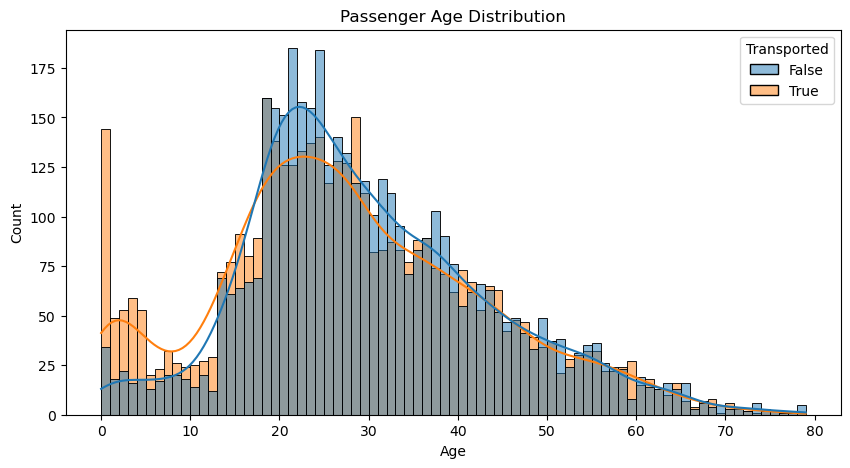

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Passenger Age Distribution')

- 0-18 year olds would be **more** likely to be transported.
- 19-44 year olds would be **less** likely to be transported.
- Over 45 year olds would be **equally** likely to be transported.

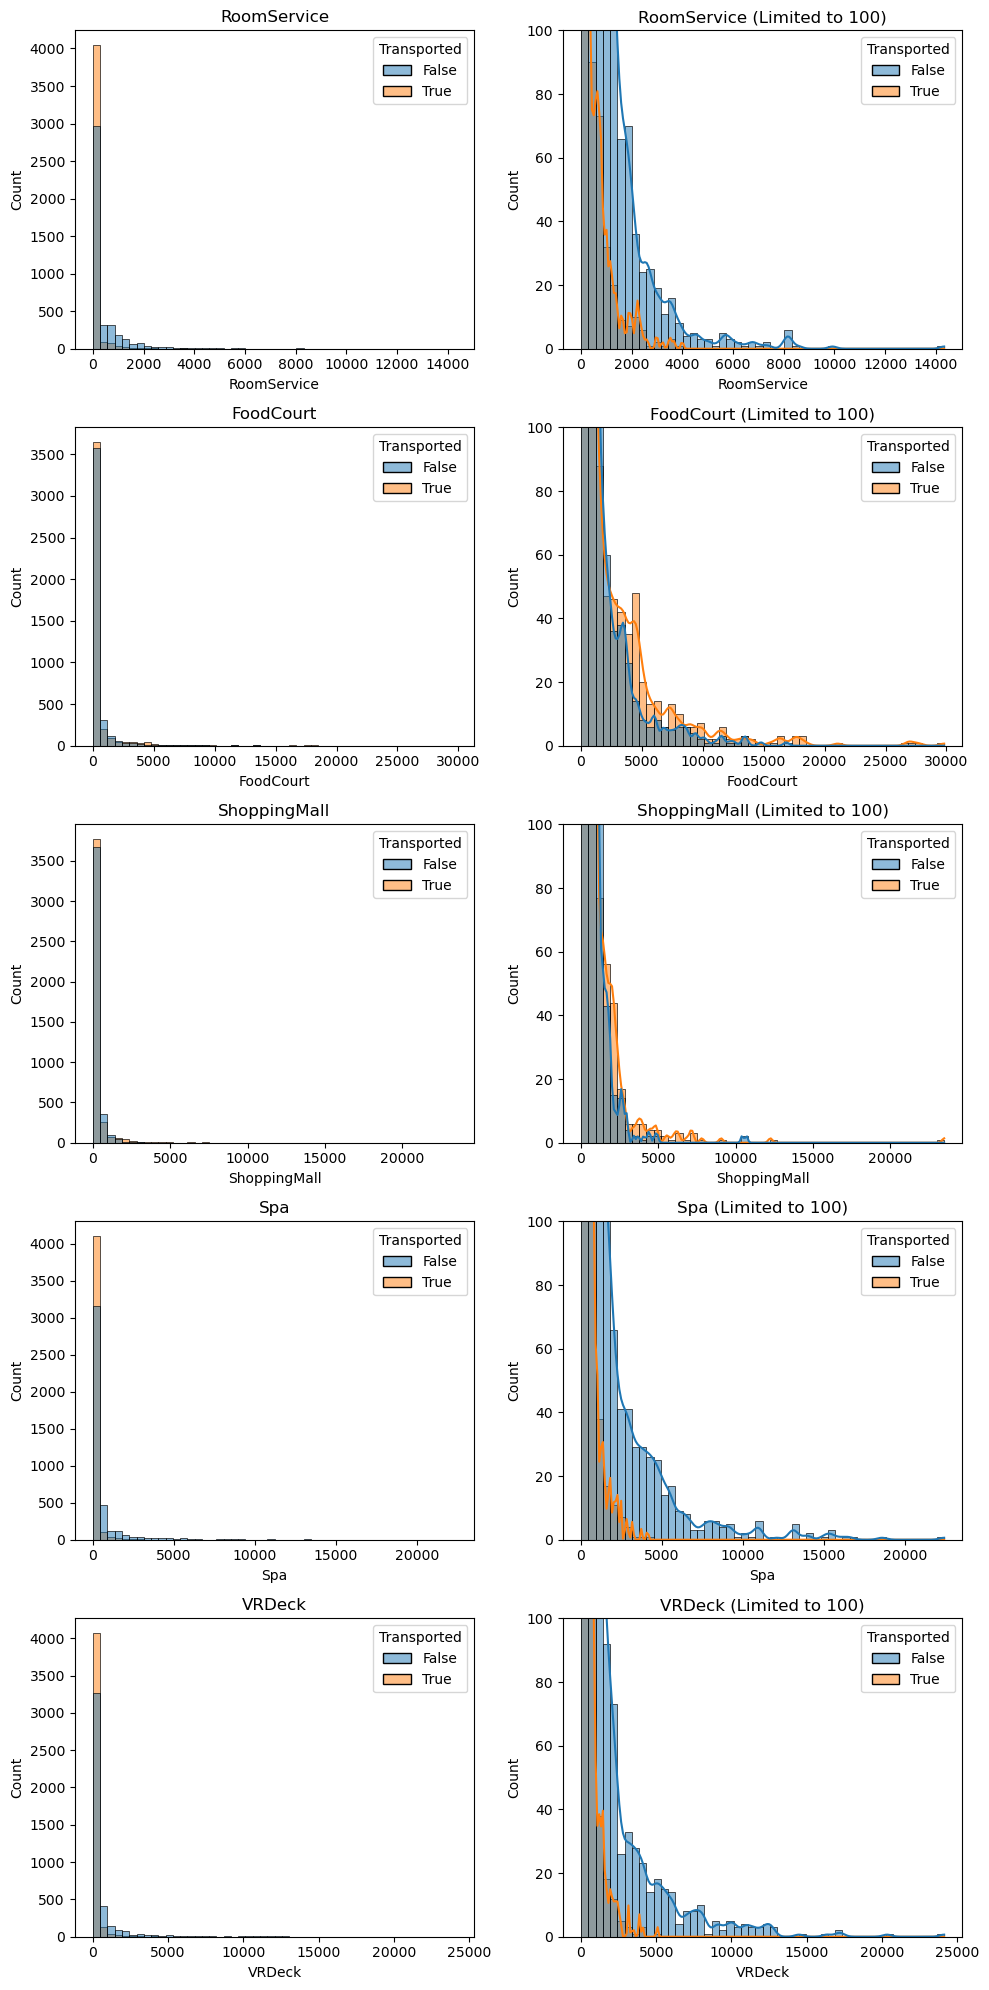

In [9]:
# Expenditure features
expenditures=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax =plt.subplots(ncols = 2, nrows = 5, figsize=(10,20))
for i in range(len(expenditures)):
    # Left plot
    sns.histplot(data = df_train, 
                 x = expenditures[i], 
                 ax = ax[i][0], 
                 bins = 50, 
                 kde = False, 
                 hue = 'Transported')
    ax[i][0].set_title(expenditures[i])
    
    # Right plot (truncated)
    sns.histplot(data = df_train, 
                 x = expenditures[i], 
                 ax = ax[i][1], 
                 bins = 50, 
                 kde = True, 
                 hue = 'Transported')
    ax[i][1].set_ylim([0,100])
    ax[i][1].set_title(f"{expenditures[i]} (Truncated to 100 people)")
fig.tight_layout()
plt.show()

Passengers who have expenditures on the trip mostly would not be transported. The exception being people who spend money on food courts would be more likely to be transported than not.

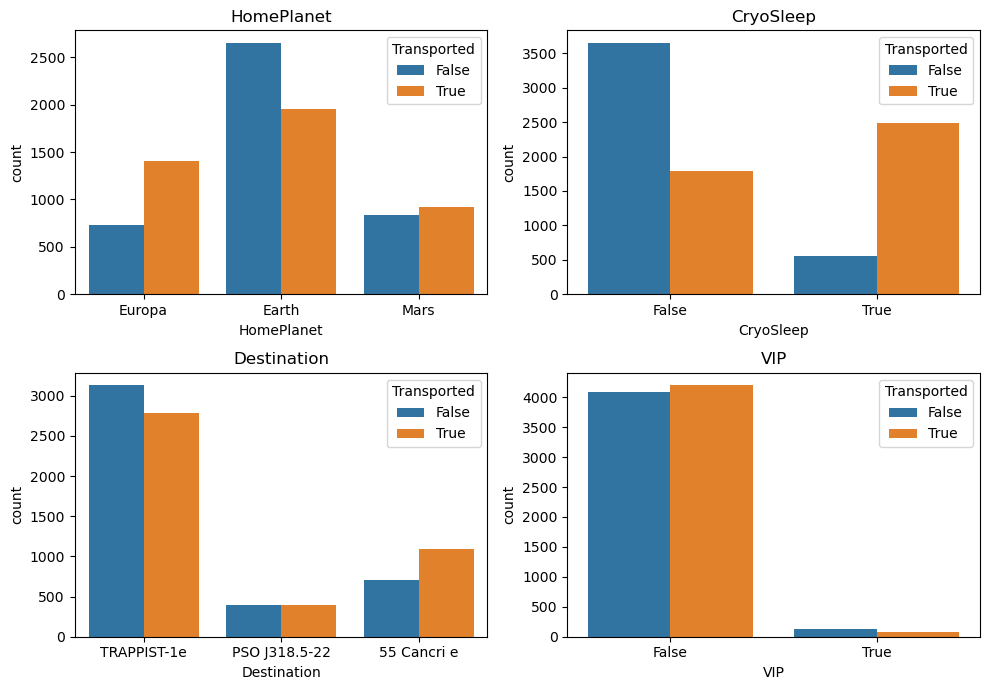

In [10]:
# Categorical features
categoricals = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2, 
                       figsize=(10,7))
k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data = df_train, 
                      x = categoricals[k], 
                      ax = ax[i][j], 
                      hue='Transported')
        ax[i][j].set_title(categoricals[k])
        k = k + 1
fig.tight_layout()
plt.show()

- Passengers who are from Europa and Mars are more likely to be transported
- Passengers who are going to 55 Cancri e are more likely to be transported
- The VIP class is so imbalanced, and the passengers who are in the VIP class are less likely to be transported
- The most important feature seems to be the CryoSleep feature, which the passengers who are in Cryo Sleep are more likely to be transported 

In [11]:
# Qualitative features
qualitatives = ['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
df_train[qualitatives]

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
...,...,...,...
8688,9276_01,A/98/P,Gravior Noxnuther
8689,9278_01,G/1499/S,Kurta Mondalley
8690,9279_01,G/1500/S,Fayey Connon
8691,9280_01,E/608/S,Celeon Hontichre


- PassengerID: Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- Cabin: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Name: The first and last names of the passenger.

We can extract the group, and group number

We can also extract the cabin deck, cabin number, and which side

We can then extract families using first and last names

## Feature Eningeering

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/2880754585.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18 Years Old and Below' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[(df_train['Age']<=18),'AgeGroup'] = '18 Years Old and Below'
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/2880754585.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18 Years Old and Below' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['Age']<=18,'AgeGroup'] = '18 Years Old and Below'


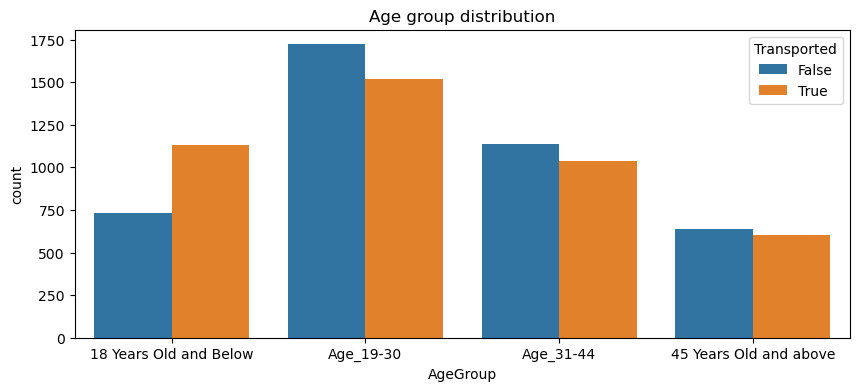

In [12]:
# New features - training set
df_train['AgeGroup'] = np.nan
df_train.loc[(df_train['Age']<=18),'AgeGroup'] = '18 Years Old and Below'
df_train.loc[(df_train['Age']>18) & (df_train['Age']<=30),'AgeGroup'] = 'Age_19-30'
df_train.loc[(df_train['Age']>30) & (df_train['Age']<=44),'AgeGroup'] = 'Age_31-44'
df_train.loc[df_train['Age']>44,'AgeGroup'] = '45 Years Old and above'

# New features - test set
df_test['AgeGroup']=np.nan
df_test.loc[df_test['Age']<=18,'AgeGroup'] = '18 Years Old and Below'
df_test.loc[(df_test['Age']>18) & (df_test['Age']<44),'AgeGroup'] = 'Age_19-44'
df_test.loc[(df_test['Age']>30) & (df_test['Age']<=44),'AgeGroup'] = 'Age_31-44'
df_test.loc[df_test['Age']>44,'AgeGroup'] = '45 Years Old and above'

# Plot distribution of new features
plt.figure(figsize = (10,4))
sns.countplot(data = df_train, x = 'AgeGroup', hue = 'Transported', 
              order = ['18 Years Old and Below','Age_19-30', 'Age_31-44', '45 Years Old and above'])
plt.title('Age group distribution')
plt.show()

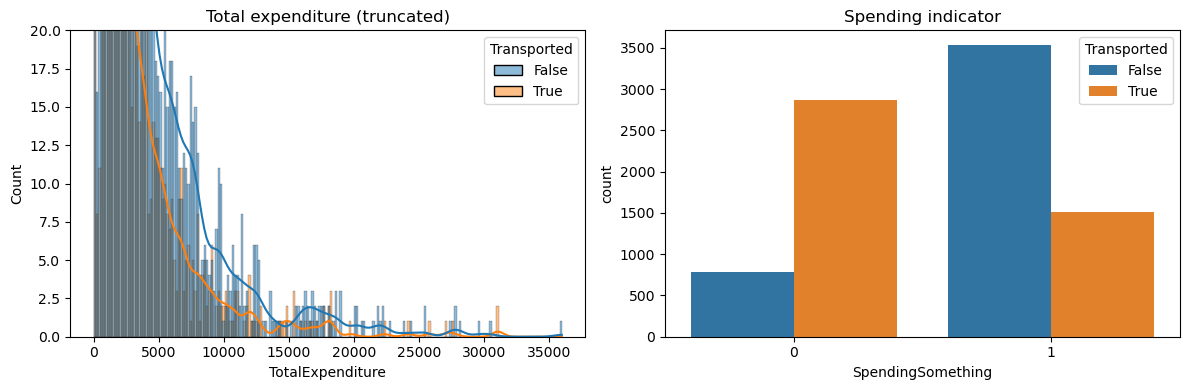

In [13]:
# New expenditure feature on training set
df_train['TotalExpenditure'] = df_train[expenditures].sum(axis=1)
df_train['SpendingSomething'] = (df_train['TotalExpenditure']!=0).astype(int)

# New spending indicator feature on training set
df_test['TotalExpenditure'] = df_test[expenditures].sum(axis=1)
df_test['SpendingSomething'] = (df_test['TotalExpenditure']!=0).astype(int)

# Plot distribution of new features
fig, ax = plt.subplots(ncols = 2, figsize=(12,4))
sns.histplot(data=df_train, x='TotalExpenditure', hue='Transported', bins=200, ax = ax[0], kde = True)
ax[0].set_title('Total expenditure (truncated)')
ax[0].set_ylim([0,20])


sns.countplot(data=df_train, x='SpendingSomething', hue='Transported', ax = ax[1])
ax[1].set_title('Spending indicator')
fig.tight_layout()

It is surprising to see that the amount of passengers who did not spend something on this trip is more likely to be transported. This may come to the fact that the passengers who are in Cryo Sleep are not able to purchase anything.

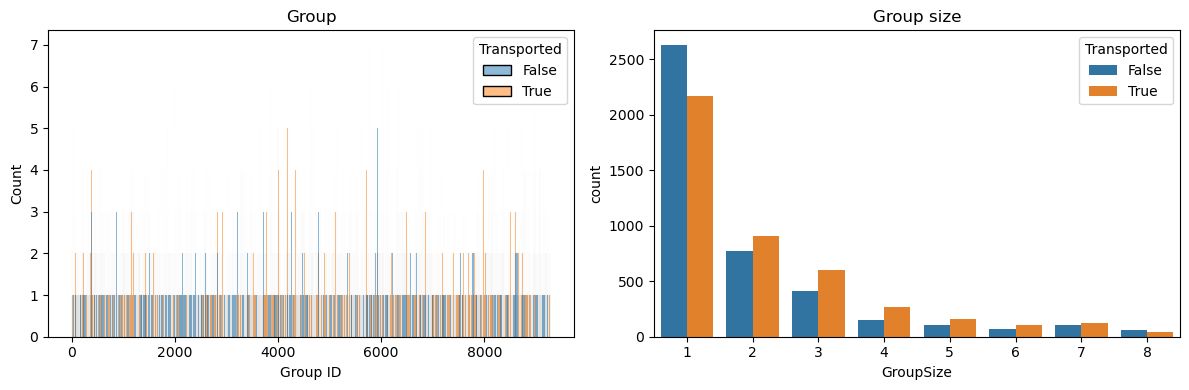

In [14]:
# New feature - Group
df_train['Group'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df_test['Group'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
df_train['GroupSize'] = df_train['Group'].map(lambda x: pd.concat([df_train['Group'], df_test['Group']]).value_counts()[x])
df_test['GroupSize'] = df_test['Group'].map(lambda x: pd.concat([df_train['Group'], df_test['Group']]).value_counts()[x])

# Plot distribution of new features
fig, ax = plt.subplots(ncols = 2, figsize=(12,4))
sns.histplot(data=df_train, x='Group', hue='Transported', binwidth=1, ax = ax[0])
ax[0].set_xlabel('Group ID')
ax[0].set_title('Group')

sns.countplot(data=df_train, x='GroupSize', hue='Transported', ax = ax[1])
ax[1].set_title('Group size')
fig.tight_layout()

Through extracting the group size, passengers with group size of 2 until 7 are more likely to be transported. It seems that the most passengers that are in a group is 8.

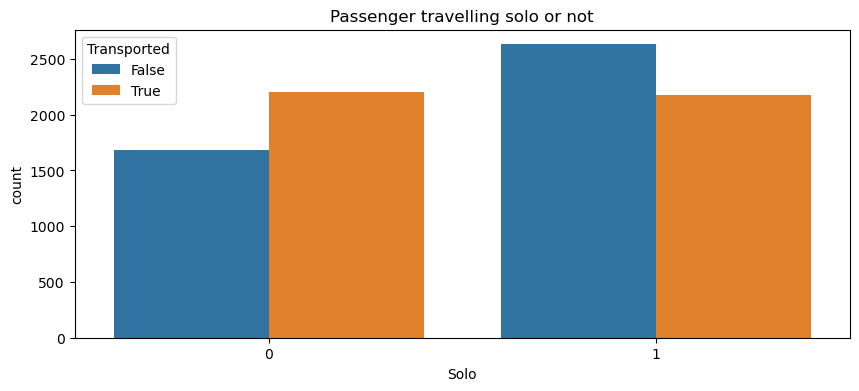

In [15]:
# New feature
df_train['Solo'] = (df_train['GroupSize'] == 1).astype(int)
df_test['Solo'] = (df_test['GroupSize'] == 1).astype(int)

# New feature distribution
plt.figure(figsize = (10,4))
sns.countplot(data = df_train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.show()

Through the group size we would then be able to see if the passengers are travelling alone or not. It seems that the solo travellers are less likely to be transported than the solo traveler.

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/3658672332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cabin'].fillna('Z/9999/Z', inplace = True)
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/3658672332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

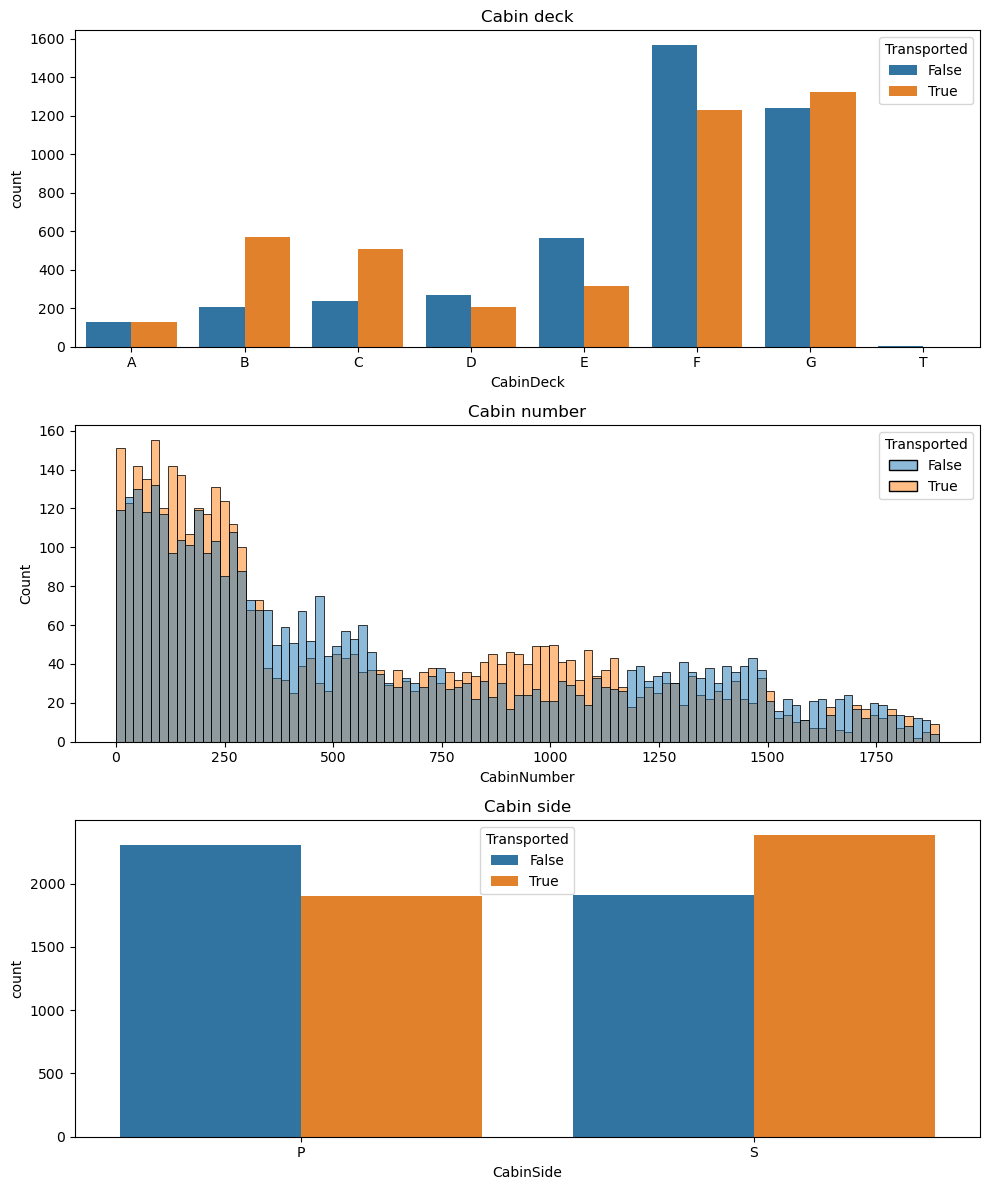

In [16]:
# Replace NaN's with outliers for now (so we can split feature)
df_train['Cabin'].fillna('Z/9999/Z', inplace = True)
df_test['Cabin'].fillna('Z/9999/Z', inplace = True)

# New features - training set
df_train['CabinDeck'] = df_train['Cabin'].apply(lambda x: x.split('/')[0])
df_train['CabinNumber'] = df_train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_train['CabinSide'] = df_train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
df_test['CabinDeck'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])
df_test['CabinNumber'] = df_test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_test['CabinSide'] = df_test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
df_train.loc[df_train['CabinDeck']=='Z', 'CabinDeck']=np.nan
df_train.loc[df_train['CabinNumber']==9999, 'CabinNumber']=np.nan
df_train.loc[df_train['CabinSide']=='Z', 'CabinSide']=np.nan
df_test.loc[df_test['CabinDeck']=='Z', 'CabinDeck']=np.nan
df_test.loc[df_test['CabinNumber']==9999, 'CabinNumber']=np.nan
df_test.loc[df_test['CabinSide']=='Z', 'CabinSide']=np.nan

# Drop Cabin (we don't need it anymore)
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig, ax = plt.subplots(nrows = 3, figsize=(10,12))

sns.countplot(data = df_train, x = 'CabinDeck', hue = 'Transported', order = ['A','B','C','D','E','F','G','T'], ax = ax[0])
ax[0].set_title('Cabin deck')

sns.histplot(data=df_train, x='CabinNumber', hue='Transported',binwidth=20, ax = ax[1])
ax[1].set_title('Cabin number')

sns.countplot(data=df_train, x='CabinSide', hue='Transported', ax = ax[2])
ax[2].set_title('Cabin side')
fig.tight_layout()

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/106623503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Name'].fillna('NaN NaN', inplace=True)
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/106623503.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

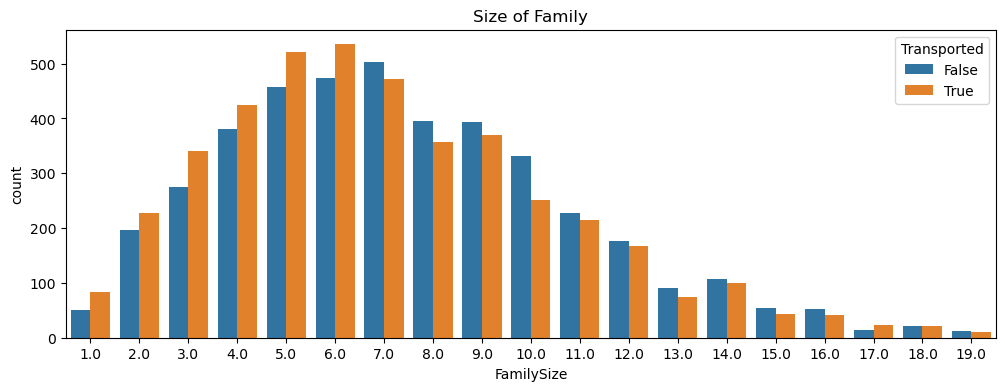

In [17]:
# Replace NaN's with outliers for now (so we can split feature)
df_train['Name'].fillna('NaN NaN', inplace=True)
df_test['Name'].fillna('NaN NaN', inplace=True)

# New feature - Surname
df_train['Surname'] = df_train['Name'].str.split().str[-1]
df_test['Surname'] = df_test['Name'].str.split().str[-1]

# New feature - Family size
df_train['FamilySize'] = df_train['Surname'].map(lambda x: pd.concat([df_train['Surname'], df_test['Surname']]).value_counts()[x])
df_test['FamilySize'] = df_test['Surname'].map(lambda x: pd.concat([df_train['Surname'], df_test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
df_train.loc[df_train['Surname'] == 'NaN','Surname']=np.nan
df_train.loc[df_train['FamilySize'] > 100,'FamilySize']=np.nan
df_test.loc[df_test['Surname'] == 'NaN','Surname']=np.nan
df_test.loc[df_test['FamilySize'] > 100,'FamilySize']=np.nan

# Drop name (we don't need it anymore)
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize = (12,4))
sns.countplot(data = df_train, x = 'FamilySize', hue='Transported')
plt.title('Size of Family')
plt.show()

From the last names (surnames), we can extract the family size of the passengers. It seems that small-member families are more likely to be transported. 

## Missing Values Imputation

In [18]:
# Labels and features
y = df_train['Transported'].copy().astype(int)
X = df_train.drop('Transported', axis = 1).copy()

# Concatenate dataframes
df = pd.concat([X, df_test], axis = 0).reset_index(drop=True)

In [19]:
# Columns with missing values
nan_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[nan_cols].isna().sum(), columns=['NumberMissing'])
mv['PercentageMissing(%)']=np.round(100*mv['NumberMissing']/len(df),2)
mv

,NumberMissing,PercentageMissing(%)
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


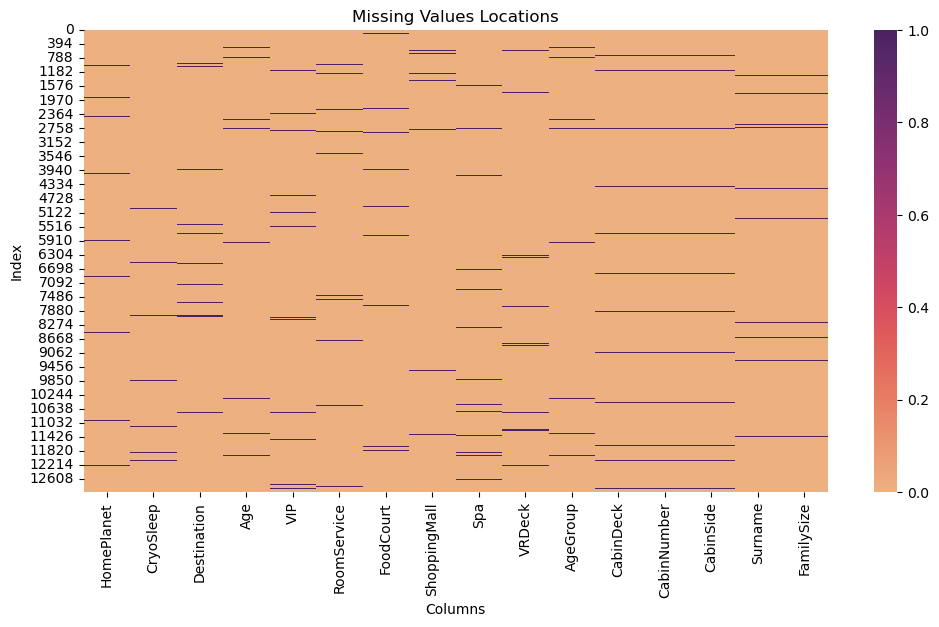

In [20]:
# Heatmap of missing values
plt.figure(figsize = (12,6))
sns.heatmap(df[nan_cols].isna(), cmap = 'flare')
plt.title('Missing Values Locations')
plt.ylabel("Index")
plt.xlabel("Columns")
plt.show()

In [21]:
def missing_value(df):
    for i in expenditures:
        df[i] = df[i].fillna(df[i].median())

    
    # Surname --> Each Surname is only registered in one group, we can extract that
    GSN_gb=df[df['GroupSize']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)
    # Missing values before
    SN_bef=df['Surname'].isna().sum()
    # Passengers with missing Surname and in a group with known majority Surname
    GSN_index=df[df['Surname'].isna()][(df[df['Surname'].isna()]['Group']).isin(GSN_gb.index)].index
    # Fill corresponding missing values
    df.loc[GSN_index,'Surname']=df.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])
    # Replace NaN's with outliers (so we can use map)
    df['Surname'].fillna('Unknown', inplace=True)
    # Update family size feature
    df['FamilySize']=df['Surname'].map(lambda x: df['Surname'].value_counts()[x])
    # Put NaN's back in place of outliers
    df.loc[df['Surname']=='Unknown','Surname']=np.nan 
    # Say unknown surname means no family
    df.loc[df['FamilySize']>100,'FamilySize']=0


    
    # HomePlanet
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    
    
    # Cryosleep --> Passengers who does not spend any expenditures are in cryosleep
    nan_rows_cryosleep = df.loc[df['CryoSleep'].isna(),'CryoSleep'].index
    df.loc[df['CryoSleep'].isna(),'CryoSleep'] = df.groupby(['SpendingSomething'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_rows_cryosleep]
    
    
    # Cabins
    df['CabinDeck'] = df['CabinDeck'].fillna(df['CabinDeck'].mode()[0])
    df['CabinNumber'] = df['CabinNumber'].fillna(df['CabinNumber'].median())
    df['CabinSide'] = df['CabinSide'].fillna(df['CabinSide'].mode()[0])
    
    
    # Age
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[(df['Age']<=18),'AgeGroup'] = '18 Years Old and Below'
    df.loc[(df['Age']>18) & (df['Age']<=30),'AgeGroup'] = 'Age_19-30'
    df.loc[(df['Age']>30) & (df['Age']<=44),'AgeGroup'] = 'Age_31-44'
    df.loc[df['Age']>44,'AgeGroup'] = '45 Years Old and above'
    
    # Destination
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df = df.drop(['VIP', 'Surname'], axis = 1)
    return df

In [22]:
df = missing_value(df)

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/118125050.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Surname'].fillna('Unknown', inplace=True)
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23833/118125050.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df[

In [23]:
print(df.info())
print("\n\n\n")
print("Missing Values:\n\n",df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        12970 non-null  object 
 1   HomePlanet         12970 non-null  object 
 2   CryoSleep          12970 non-null  object 
 3   Destination        12970 non-null  object 
 4   Age                12970 non-null  float64
 5   RoomService        12970 non-null  float64
 6   FoodCourt          12970 non-null  float64
 7   ShoppingMall       12970 non-null  float64
 8   Spa                12970 non-null  float64
 9   VRDeck             12970 non-null  float64
 10  AgeGroup           12970 non-null  object 
 11  TotalExpenditure   12970 non-null  float64
 12  SpendingSomething  12970 non-null  int64  
 13  Group              12970 non-null  int64  
 14  GroupSize          12970 non-null  int64  
 15  Solo               12970 non-null  int64  
 16  CabinDeck          129

In [24]:
df[expenditures]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
12965,0.0,0.0,0.0,0.0,0.0
12966,0.0,847.0,17.0,10.0,144.0
12967,0.0,0.0,0.0,0.0,0.0
12968,0.0,2680.0,0.0,0.0,523.0


In [25]:
expenditures.append('TotalExpenditure')
for i in expenditures:
    df[i] = np.log(1+df[i])

df[expenditures]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExpenditure
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588
2,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021
3,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981
4,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766
...,...,...,...,...,...,...
12965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12966,0.000000,6.742881,2.890372,2.397895,4.976734,6.926577
12967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12968,0.000000,7.893945,0.000000,0.000000,6.261492,8.072155


In [27]:
categoricals = ['HomePlanet', 
                'Destination', 
                'AgeGroup',
                'CabinDeck']
numericals = ['Age',
              'RoomService', 
              'FoodCourt', 
              'ShoppingMall', 
              'Spa', 
              'VRDeck',
              'TotalExpenditure', 
              'GroupSize',
              'CabinNumber', 
              'FamilySize']

encoder = OneHotEncoder(sparse_output= False)
scaler = StandardScaler()
df[numericals] = scaler.fit_transform(df[numericals])



# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categoricals])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categoricals))
df = pd.concat([df, one_hot_df], axis=1)
df = df.drop(categoricals, axis=1)

In [28]:
map_cabin_side = {'P': 1, 'S': 0}
df['CabinSide'] = df['CabinSide'].map(map_cabin_side)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      12970 non-null  object 
 1   CryoSleep                        12970 non-null  object 
 2   Age                              12970 non-null  float64
 3   RoomService                      12970 non-null  float64
 4   FoodCourt                        12970 non-null  float64
 5   ShoppingMall                     12970 non-null  float64
 6   Spa                              12970 non-null  float64
 7   VRDeck                           12970 non-null  float64
 8   TotalExpenditure                 12970 non-null  float64
 9   SpendingSomething                12970 non-null  int64  
 10  Group                            12970 non-null  int64  
 11  GroupSize                        12970 non-null  float64
 12  Solo              

## Data Preparation

### Inputting back the data to train and test

In [30]:
X=df[df['PassengerId'].isin(df_train['PassengerId'].values)].copy()
X_test=df[df['PassengerId'].isin(df_test['PassengerId'].values)].copy()

X = X.drop(['PassengerId', 'Group'], axis = 1)
X_test = X_test.drop(['PassengerId', 'Group'], axis = 1)

### Feature Selection: PCA

[ 25.47106733  37.94206211  48.55414136  56.31349269  63.45607359
  68.66931065  73.38916106  78.00372579  81.9337474   84.56274993
  87.05874605  89.27587655  91.1243717   92.66646169  94.09866042
  95.16817761  96.05972735  96.80376092  97.52885154  98.19976974
  98.8200053   99.18406425  99.46883382  99.73427096  99.86176415
  99.96864028  99.99518585 100.         100.         100.
 100.         100.        ] % cummulative variance


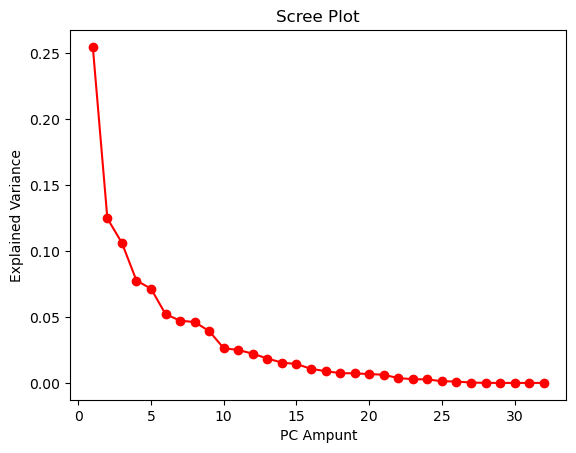

In [35]:
pca = PCA(random_state=42)
principalComponents = pca.fit_transform(X)

print( np.cumsum(pca.explained_variance_ratio_)*100, '% cummulative variance')


PC = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('PC Ampunt')
plt.ylabel('Explained Variance')
plt.show()

[25.47106733 37.94206211 48.55414136 56.31349269 63.45607359 68.66931065
 73.38916106 78.00372579 81.9337474  84.56274993 87.05874605 89.27587655
 91.1243717  92.66646169 94.09866041] % cummulative variance


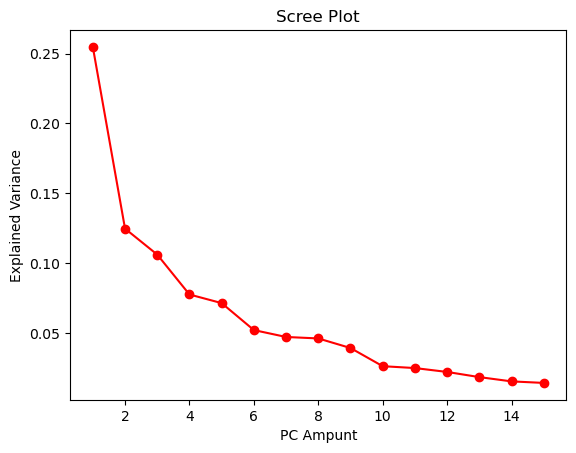

In [36]:
pca = PCA(n_components=15, random_state=0)
principalComponents = pca.fit_transform(X)

print( np.cumsum(pca.explained_variance_ratio_)*100, '% cummulative variance')

PC = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('PC Ampunt')
plt.ylabel('Explained Variance')
plt.show()

In [37]:
X = principalComponents
X_test = pca.transform(X_test)

### Train-Val Splitting

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Modeling
Cross Validation is used to determine the best parameters of the model

### K-Nearest Neighbors

In [42]:
KNN = KNeighborsClassifier( metric = 'minkowski' )

# Parameters 
n_neighbors = [3, 5, 7, 9, 11, 13, 15]
p = [1,2]

# GridSearch
Grid = {'n_neighbors' : n_neighbors,
       'p' : p}
KNN_CV = GridSearchCV(estimator = KNN, param_grid = Grid)

In [51]:
KNN_CV.fit(X_train,y_train)
y_pred_knn = KNN_CV.predict(X_val)

print("Best Accuracy: ",KNN_CV.best_score_)
print("Best Params: \n", KNN_CV.best_params_)

Best Accuracy:  0.7735860849667355
Best Params: 
 {'n_neighbors': 15, 'p': 2}


              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1082
           1       0.77      0.77      0.77      1092

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



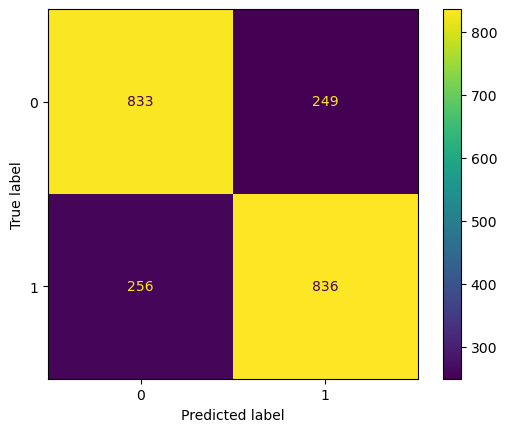

In [52]:
print(classification_report(y_pred = y_pred_knn, y_true = y_val))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_knn, y_true = y_val)
plt.show()

### Support Vector Classifier

In [54]:
params_grid_svc = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


gs_sv = GridSearchCV(SVC(), param_grid = params_grid_svc, n_jobs = -1)
gs_sv.fit(X_train, y_train)

y_pred_svc = gs_sv.predict(X_val)

print("Best Accuracy: ",gs_sv.best_score_)
print("Best Params: \n", gs_sv.best_params_)

Best Accuracy:  0.7929148873058398
Best Params: 
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1082
           1       0.76      0.84      0.80      1092

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



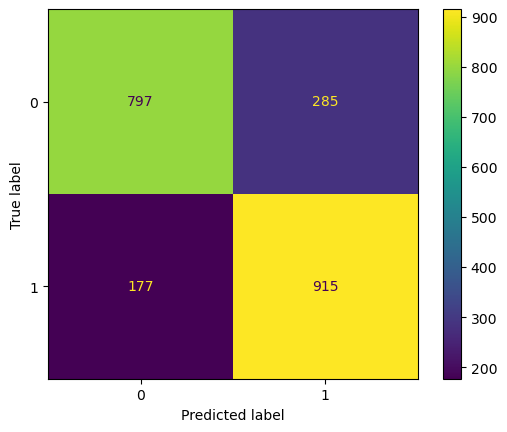

In [55]:
print(classification_report(y_pred = y_pred_svc, y_true = y_val))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_svc, y_true = y_val)
plt.show()

## Gaussian Naïve Bayes

In [67]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

y_pred_nb = nbModel_grid.predict(X_val)

print("Best Accuracy: ",nbModel_grid.best_score_)
print("Best Params: \n", nbModel_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy:  0.7545670652983141
Best Params: 
 {'var_smoothing': 0.23101297000831597}


              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1082
           1       0.76      0.76      0.76      1092

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.76      0.76      0.76      2174



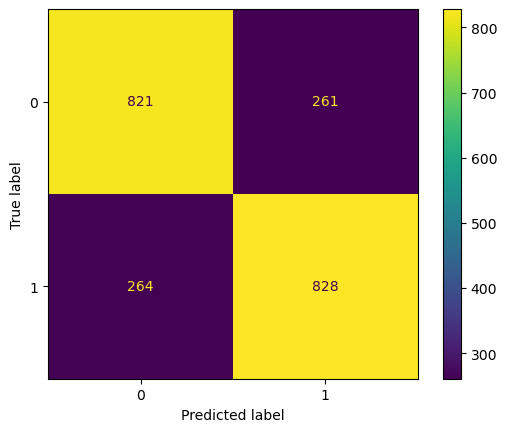

In [68]:
print(classification_report(y_pred = y_pred_nb, y_true = y_val))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_nb, y_true = y_val)
plt.show()

## Submission

SVM got the highest score, it will be submitted to the Kaggle Competition

In [56]:
submission_svm = gs_sv.predict(X_test)

In [60]:
submission_svm_df = pd.DataFrame()
submission_svm_df['PassengerId'] = df_test['PassengerId']
submission_svm_df['Transported'] = submission_svm
map_result = {1:True, 0:False }
submission_svm_df['Transported'] = submission_svm_df['Transported'].map(map_result)
submission_svm_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [61]:
submission_svm_df.to_csv("Submission_SVM.csv", index = False)

© Louis Widi and Bagus Alwan 2024